In [474]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

In [475]:
df = pd.read_csv('cs_new.csv',encoding='cp1252')
df.head()

,Age,Married_Status,How_may_money_you_can_get_in_one_month,How_many_hours_can_spend_to_degree_in_once_a_week,Emploment_status,ol_maths,ol_science,ol_history,ol_primary_language,ol_english,...,grade_for_subject03,al_stream,al_english,al_subject1,grade_for_subject1,al_subject2,grade_for_subject2,al_subject3,grade_for_subject3,degree
0,21-30 years,Single,"Less than 30,000",More than 20 hours,Unemployed,C,C,B,C,C,...,B,Arts,C,Art,B,Economics,C,Business,C,Bachelor of Industrial Studies Honours – Fashi...
1,21-30 years,Single,"Less than 30,000",More than 20 hours,Unemployed,C,C,B,C,C,...,B,Arts,S,Art,B,Economics,C,Business,C,Bachelor of Industrial Studies Honours – Fashi...
2,21-30 years,Single,"Less than 30,000",More than 20 hours,Unemployed,C,C,B,C,C,...,B,Arts,S,Art,B,Economics,C,Business,C,Bachelor of Industrial Studies Honours – Fashi...
3,21-30 years,Single,"Less than 30,000",More than 20 hours,Unemployed,C,C,B,C,C,...,B,Arts,S,Art,B,Economics,C,Business,C,Bachelor of Industrial Studies Honours – Fashi...
4,21-30 years,Single,"Less than 30,000",More than 20 hours,Unemployed,C,C,B,C,C,...,B,Arts,S,Art,B,Economics,C,Business,C,Bachelor of Industrial Studies Honours – Fashi...


In [476]:
df.columns, df.shape

(Index(['Age', 'Married_Status', 'How_may_money_you_can_get_in_one_month',
        'How_many_hours_can_spend_to_degree_in_once_a_week', 'Emploment_status',
        'ol_maths', 'ol_science', 'ol_history', 'ol_primary_language',
        'ol_english', 'ol_religion', 'ol_group01_subject',
        'grade_for_subject01', 'ol_group2_subject', 'grade_for_subject02',
        'ol_group3_subject', 'grade_for_subject03', 'al_stream', 'al_english',
        'al_subject1', 'grade_for_subject1', 'al_subject2',
        'grade_for_subject2', 'al_subject3', 'grade_for_subject3', 'degree'],
       dtype='object'),
 (322, 26))

In [477]:
#  for column in df.columns:
#     # Check if the column is of object or string type (categorical)
#     if df[column].dtype == 'object':
#         # Apply label encoding to the column
#         df[column] = label_encoder.fit_transform(df[column])

# df.head()

mapping_info = {}

# Apply label encoding to each categorical column
for column in df.columns:
    # Check if the column is of object or string type (categorical)
    if df[column].dtype == 'object':
        # Apply label encoding to the column
        df[column] = label_encoder.fit_transform(df[column])
        # Store the mapping information for the column
        mapping_info[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the labeled values for each column
for column, mapping in mapping_info.items():
    print(f"Labeled values for column '{column}':")
    for category, encoded_value in mapping.items():
        print(f"{category} = {encoded_value}")
    print()

Labeled values for column 'Age':
15-20 years  = 0
21-30 years = 1
31-40 years = 2
41-50 years = 3
More than 50 = 4

Labeled values for column 'Married_Status':
Married = 0
Single = 1

Labeled values for column 'How_may_money_you_can_get_in_one_month':
30,000 - 50,000 = 0
50,000 - 70,000 = 1
70,000 - 90,000 = 2
Less than 30,000 = 3
More than 90,000 = 4

Labeled values for column 'How_many_hours_can_spend_to_degree_in_once_a_week':
1-5 hours = 0
11-15 hours = 1
16-20 hours = 2
6-10 hours = 3
More than 20 hours = 4

Labeled values for column 'Emploment_status':
Employed full-time = 0
Employed part-time = 1
Unemployed = 2

Labeled values for column 'ol_maths':
A = 0
B = 1
C = 2

Labeled values for column 'ol_science':
A = 0
B = 1
C = 2
S = 3

Labeled values for column 'ol_history':
A = 0
B = 1
C = 2
S = 3

Labeled values for column 'ol_primary_language':
A = 0
B = 1
C = 2

Labeled values for column 'ol_english':
A = 0
B = 1
C = 2
S = 3

Labeled values for column 'ol_religion':
A = 0
B = 1


In [478]:
df['degree'].value_counts()

1     46
6     37
4     36
5     34
7     30
2     26
8     26
3     18
9     18
10    16
0     13
11    12
12    10
Name: degree, dtype: int64

In [479]:
X = df.drop(['degree'], axis = 1)
X.head(300)

,Age,Married_Status,How_may_money_you_can_get_in_one_month,How_many_hours_can_spend_to_degree_in_once_a_week,Emploment_status,ol_maths,ol_science,ol_history,ol_primary_language,ol_english,...,ol_group3_subject,grade_for_subject03,al_stream,al_english,al_subject1,grade_for_subject1,al_subject2,grade_for_subject2,al_subject3,grade_for_subject3
0,1,1,3,4,2,2,2,1,2,2,...,0,1,0,2,1,1,3,1,1,2
1,1,1,3,4,2,2,2,1,2,2,...,0,1,0,3,1,1,3,1,1,2
2,1,1,3,4,2,2,2,1,2,2,...,0,1,0,3,1,1,3,1,1,2
3,1,1,3,4,2,2,2,1,2,2,...,0,1,0,3,1,1,3,1,1,2
4,1,1,3,4,2,2,2,1,2,2,...,0,1,0,3,1,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,1,3,4,2,0,0,1,1,0,...,2,1,4,1,0,2,0,2,2,3
296,1,1,2,0,0,1,0,2,0,1,...,2,1,4,2,2,0,2,0,5,2
297,0,1,3,4,2,0,2,1,1,0,...,2,1,4,1,0,2,0,2,2,3
298,1,1,2,0,0,1,0,2,0,1,...,2,1,4,2,2,0,2,0,5,2


In [480]:
y = df['degree']
y.head()

0    2
1    2
2    2
3    2
4    2
Name: degree, dtype: int32

In [481]:
# df.hist(column='How_may_money_you_can_get_in_one_month', bins=50)

**Normalize Data**

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [482]:
# X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

In [483]:
X[0:1]

,Age,Married_Status,How_may_money_you_can_get_in_one_month,How_many_hours_can_spend_to_degree_in_once_a_week,Emploment_status,ol_maths,ol_science,ol_history,ol_primary_language,ol_english,...,ol_group3_subject,grade_for_subject03,al_stream,al_english,al_subject1,grade_for_subject1,al_subject2,grade_for_subject2,al_subject3,grade_for_subject3
0,1,1,3,4,2,2,2,1,2,2,...,0,1,0,2,1,1,3,1,1,2


In [484]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (257, 25) (257,)
Test set: (65, 25) (65,)


In [485]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

**Define and train the KNN model**

In [486]:
k = 4
#Train Model
model = KNeighborsClassifier(n_neighbors = k)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

**Get predictions**

In [487]:
Pred_y = model.predict(X_test)
print("Accuracy of model at K=4 is",metrics.accuracy_score(y_test, Pred_y))

Accuracy of model at K=4 is 0.9538461538461539


In [488]:
Pred_y

array([ 8,  2,  6,  1,  1,  7,  5,  6,  7,  5, 10,  2,  2,  2,  8,  6,  1,
        1,  1,  8,  5,  4,  1,  6,  2,  2,  5, 11,  1,  8,  5,  5,  3,  4,
       11,  5,  5, 10,  1, 11,  1,  7,  8, 11,  2,  6,  1, 10,  6,  5, 10,
        6,  2,  7,  5,  5,  4,  7,  4, 12,  7, 10,  8, 10,  6])

Minimum error:- 0.046153846153846156 at K = 0


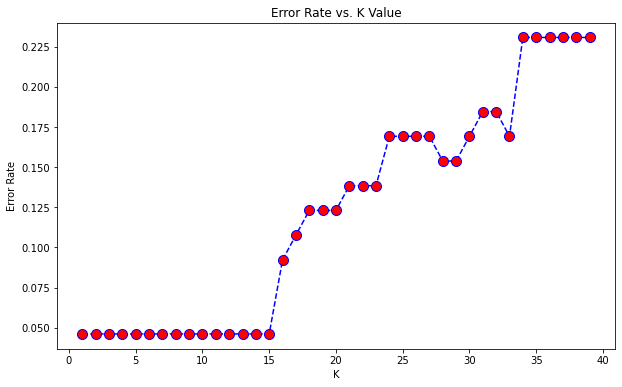

In [489]:
Ks = 40
error_rate = []
# Will take some time
for i in range(1,40):

 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.9538461538461539 at K = 0


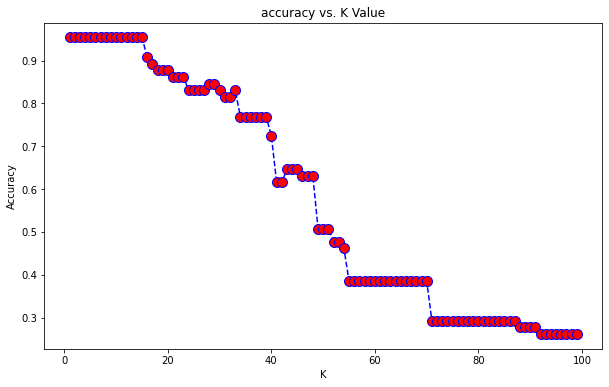

In [490]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,100):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))

plt.figure(figsize=(10,6))
plt.plot(range(1,100),acc,color = 'blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [491]:
# import joblib
# from sklearn.externals import joblib
# joblib.dump(model, 'model.pkl')

import pickle
pickle.dump(model, open('model.pkl','wb'))

In [492]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[1,1,0,4,1,0,1,1,1,3,1,0,1,4,2,2,2,2,3,3,3,4,1,2,3]]))

[8]


In [493]:
first_row_array0 = df.iloc[0].values
first_row_array1 = df.iloc[1].values
first_row_array2 = df.iloc[2].values
first_row_array3 = df.iloc[3].values
print(first_row_array0)
print(first_row_array1)
print(first_row_array2)
print(first_row_array3)

[1 1 3 4 2 2 2 1 2 2 1 3 1 1 1 0 1 0 2 1 1 3 1 1 2 2]
[1 1 3 4 2 2 2 1 2 2 1 3 1 1 1 0 1 0 3 1 1 3 1 1 2 2]
[1 1 3 4 2 2 2 1 2 2 1 3 1 1 1 0 1 0 3 1 1 3 1 1 2 2]
[1 1 3 4 2 2 2 1 2 2 1 3 1 1 1 0 1 0 3 1 1 3 1 1 2 2]


In [494]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[1,1,0,4,1,0,1,1,1,3,1,0,1,4,2,2,2,2,2,3,3,4,1,2,2]]))
print(model.predict([[1,1,3,4,2,2,2,1,2,2,1,3,1,1,1,0,1,0,2,1,1,3,1,1,2]]))
print(model.predict([[0,1,3,4,2,0,0,1,1,0,0,0,0,4,0,2,1,3,1,0,2,0,2,2,3]]))
print(model.predict([[1,0,2,2,0,0,1,0,1,0,0,0,0,0,2,2,0,2,1,3,3,4,1,2,2]]))

[8]
[2]
[5]
[6]


In [495]:
# # Get the predicted probabilities for each class
# proba_scores = knn.predict_proba(X_test)

# Determine the class with the highest probability for each test sample
# predictions = []
# for sample_probs in proba_scores:
#     # Sort the probabilities in descending order and get the corresponding class indices
#     sorted_indices = sample_probs.argsort()[::-1]
    
#     # Select the class with the highest probability
#     most_weighted_class = sorted_indices[0]
    
#     # Append the class to the predictions list
#     predictions.append(most_weighted_class)

# # Print the predictions
# print(predictions)

import pickle

# Load the pickled model
with open('model.pkl', 'rb') as file:
    model = pickle.load(file)

# Access and print the model's parameters
print("Number of neighbors:", model.n_neighbors)
print("Distance metric:", model.metric)
# Add more attributes as needed

Number of neighbors: 4
Distance metric: minkowski


In [496]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.datasets import load_iris

# # new_sample = [[1,0,2,2,0,0,1,0,1,0,0,0,0,0,2,2,0,2,1,3,3,4,1,2,2]]
# scaled_inputs_all.iloc[shuffled_indices]

# predicted_labels = model.predict([[1,0,2,2,0,0,1,0,1,0,0,0,0,0,2,2,0,2,1,3,3,4,1,2,2]])

# # Get the indices of the nearest neighbors
# distances, indices = model.kneighbors([[1,0,2,2,0,0,1,0,1,0,0,0,0,0,2,2,0,2,1,3,3,4,1,2,2]])

# # # Get the actual samples for the nearest neighbors
# nearest_neighbors = X[indices[0]]

# # Get the class labels for the nearest neighbors
# neighbor_labels = y[indices[0]]

# # Print the predicted label and the nearest neighbors' labels
# print("Predicted Label:", predicted_labels[0])
# print("Nearest Neighbors' Labels:", neighbor_labels)

In [497]:
# from sklearn.preprocessing import LabelEncoder
# import pandas as pd

# # Create a DataFrame
# df = pd.DataFrame({
#     'Color': ['red', 'blue', 'green', 'red', 'blue'],
#     'Size': ['small', 'large', 'medium', 'medium', 'small'],
#     'Shape': ['circle', 'square', 'triangle', 'circle', 'square']
# })

# Create an instance of LabelEncoder
# label_encoder = LabelEncoder()

# Dictionary to store mapping information for each column
# mapping_info = {}

# # Apply label encoding to each categorical column
# for column in df.columns:
#     # Check if the column is of object or string type (categorical)
#     if df[column].dtype == 'object':
#         # Apply label encoding to the column
#         df[column] = label_encoder.fit_transform(df[column])
#         # Store the mapping information for the column
#         mapping_info[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# # Print the labeled values for each column
# for column, mapping in mapping_info.items():
#     print(f"Labeled values for column '{column}':")
#     for category, encoded_value in mapping.items():
#         print(f"{category} = {encoded_value}")
#     print()
